In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
from math import sqrt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [ ]:
lat_lon_main = pd.read_excel("/content/drive/MyDrive/ML_TCBOB/People/Rifat/data tables/scatch.xlsx")
lat_lon_main

,Cyclone No,Date,hours,minMSL,Maxwind,lat,lon,lat+1,lon+1,lat+2,...,lat+5,lon+5,lat+6,lon+6,lat+12,lon+12,lat+18,lon+18,lat+24,lon+24
0,1,1979-05-07 22:00:00,1,99568.805,17.309776,6.75,86.50,6.75,86.25,6.75,...,6.75,86.00,6.75,86.00,6.50,86.00,6.50,86.00,7.75,86.25
1,1,1979-05-07 23:00:00,2,99571.960,15.422698,6.75,86.25,6.75,86.25,6.75,...,6.75,86.00,6.75,85.75,6.25,86.00,6.75,86.00,7.75,86.25
2,1,1979-05-08 00:00:00,3,99591.305,15.190290,6.75,86.25,6.75,86.00,6.75,...,6.75,85.75,6.75,86.00,6.25,86.00,6.75,86.25,8.00,86.25
3,1,1979-05-08 01:00:00,4,99651.000,15.313608,6.75,86.00,6.75,86.00,6.75,...,6.75,86.00,6.75,86.00,6.50,85.75,7.00,86.50,8.00,86.25
4,1,1979-05-08 02:00:00,5,99684.900,15.582188,6.75,86.00,6.75,86.00,6.75,...,6.75,86.00,6.75,86.00,6.50,86.00,7.25,86.50,8.00,86.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,55,2020-11-26 05:00:00,46,100028.670,18.663320,13.00,79.75,13.25,79.75,13.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4382,55,2020-11-26 06:00:00,47,100032.140,18.751280,13.25,79.75,13.25,79.50,13.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4383,55,2020-11-26 07:00:00,48,99978.140,18.789482,13.25,79.50,13.50,79.75,13.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4384,55,2020-11-26 08:00:00,49,99899.230,18.364544,13.50,79.75,13.50,79.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lats = lat_lon_main['lat']
lons = lat_lon_main['lon']
sl_no = lat_lon_main['Cyclone No']

In [ ]:
distance = [0]
for i in range(1,len(lats)):
  if sl_no[i] == sl_no[i-1]:
    distance.append(sqrt((lats[i]-lats[i-1])**2+(lons[i]-lons[i-1])**2))
  else:
    distance.append(0)

In [ ]:
distance

In [ ]:
for i in range(len(distance)):
  if distance[i]>=3:
    print(i,distance[i])

In [ ]:
l = [[0],[]]
for i in range(1,len(lat_lon_main)):
  if lat_lon_main['Cyclone No'][i]!= lat_lon_main['Cyclone No'][i-1]:
    l[0].append(i)
    l[1].append(i-1)
l[1].append(len(lat_lon_main)-1)

In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 39.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11080586 sha256=cb9dd972c9296349e946e287696d187d1bddaf616cff2250f3049460d42fc28d
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [ ]:
import cartopy.feature as cf
import cartopy.crs as ccrs

1


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Do

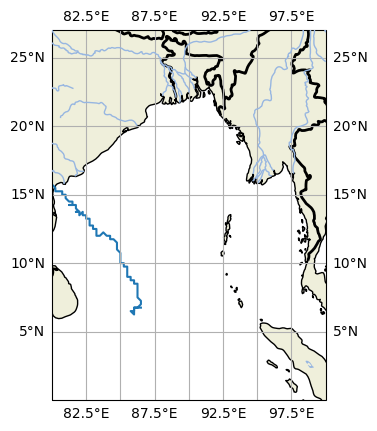

2


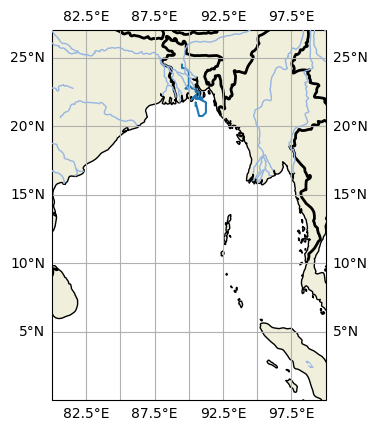

3


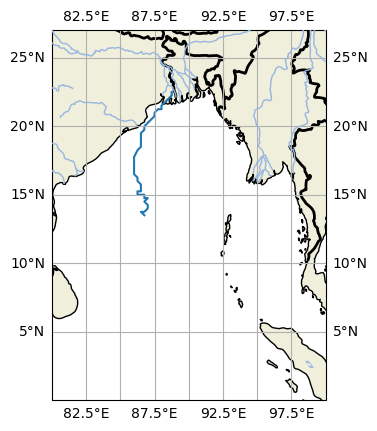

4


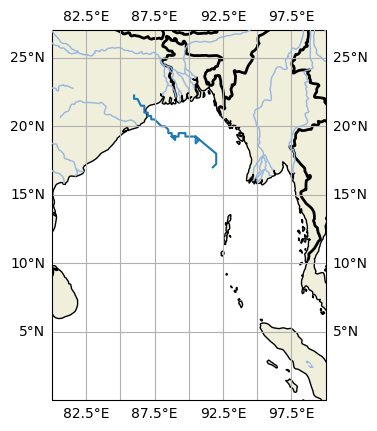

5


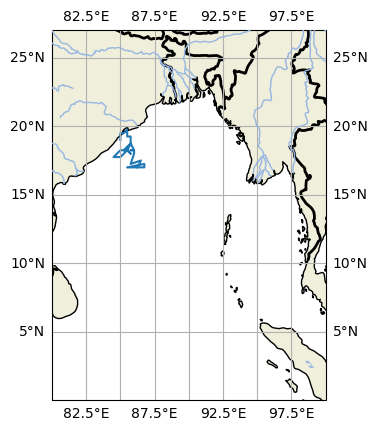

6


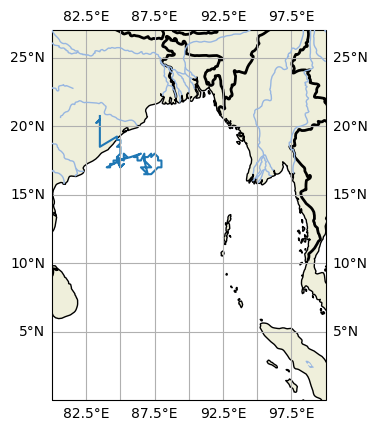

7


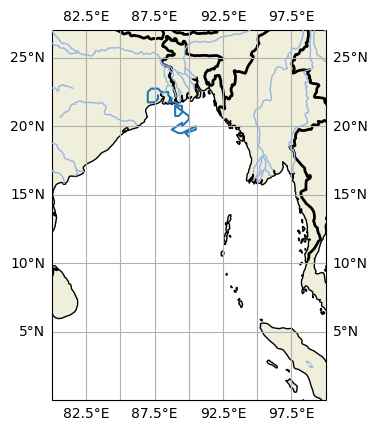

8


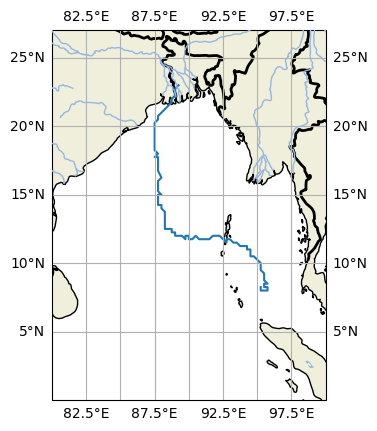

9


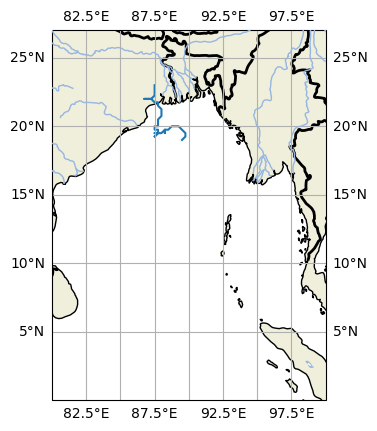

10


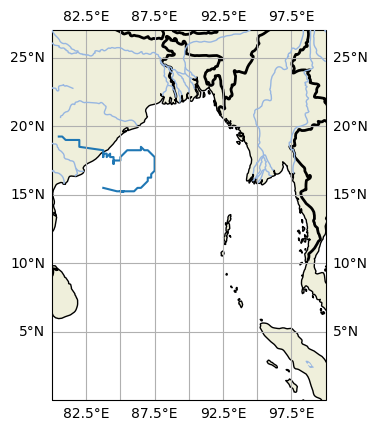

11


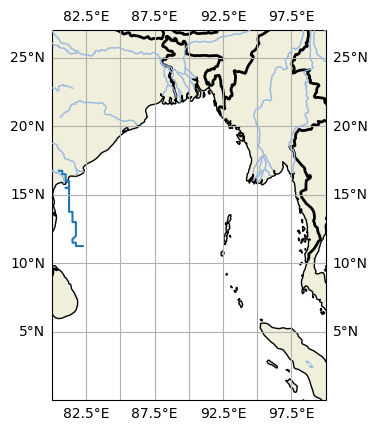

12


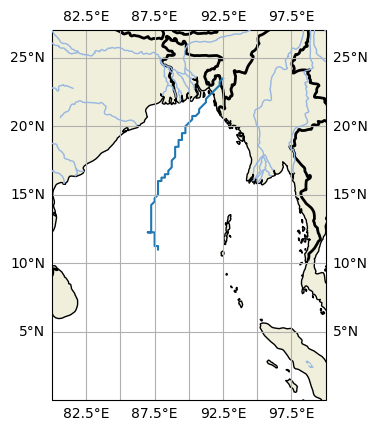

13


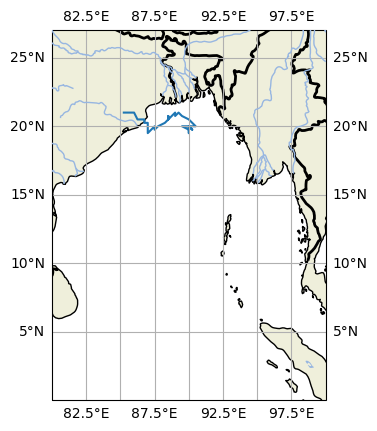

14


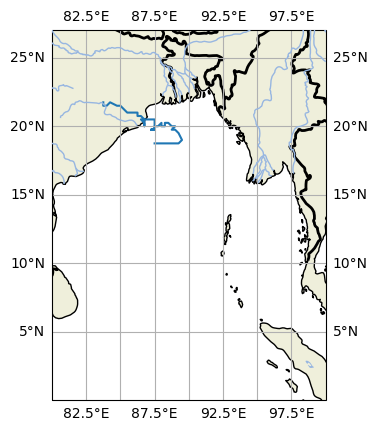

15


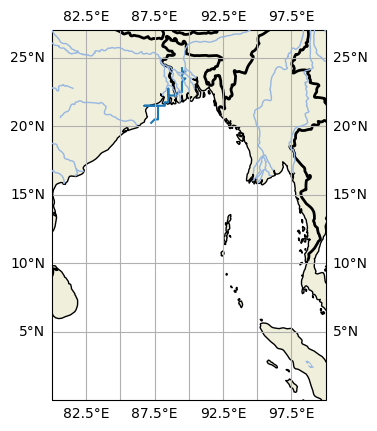

16


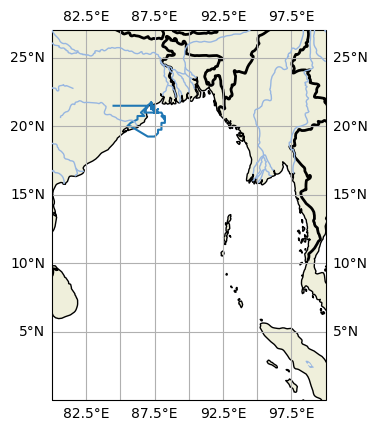

17


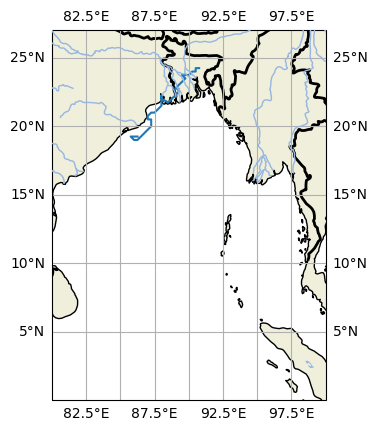

18


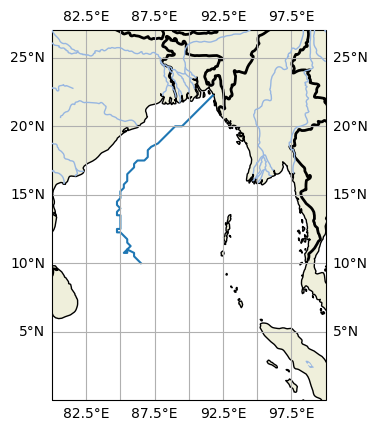

19


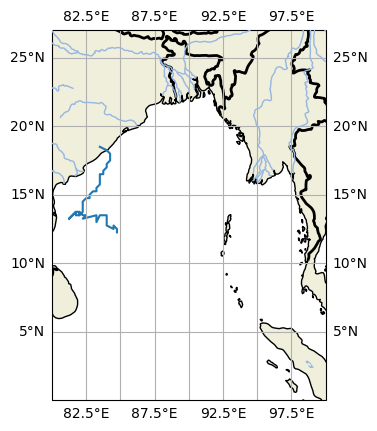

20


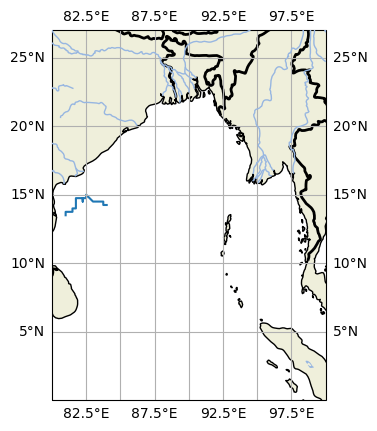

21


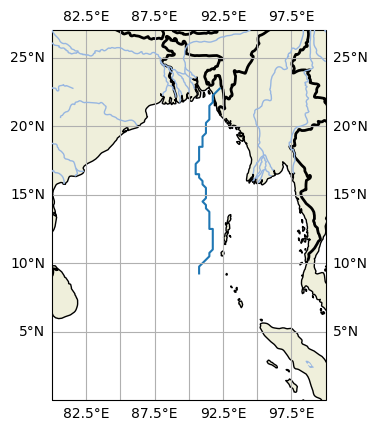

22


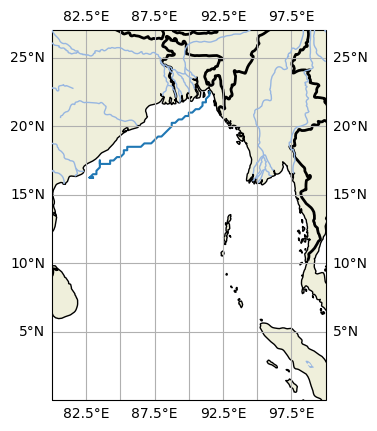

23


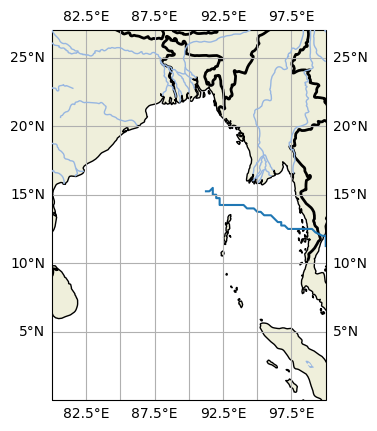

24


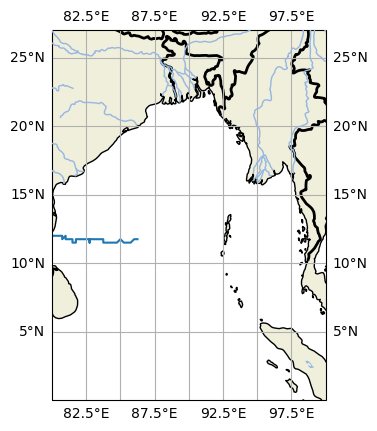

25


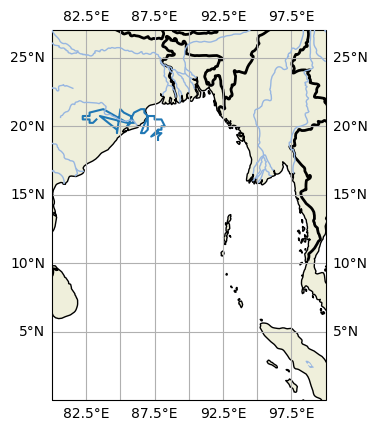

26


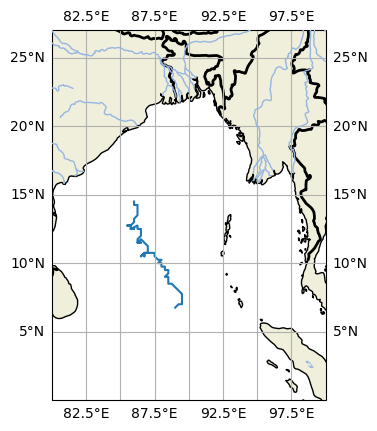

27


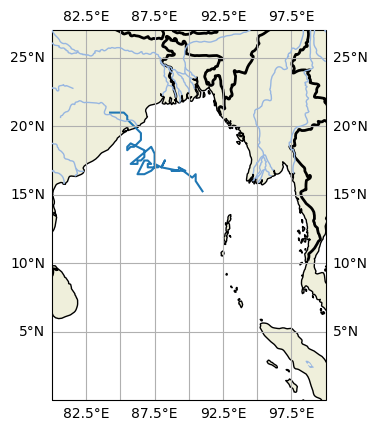

28


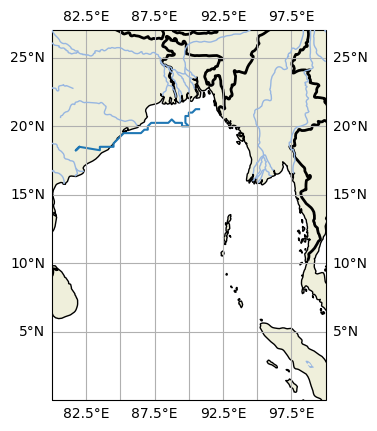

29


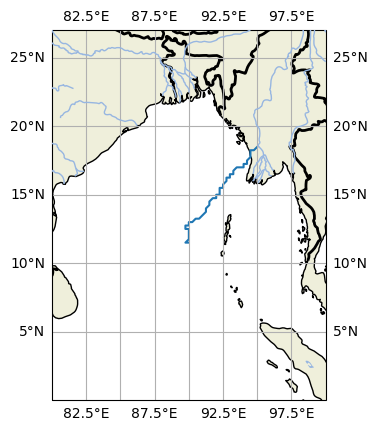

30


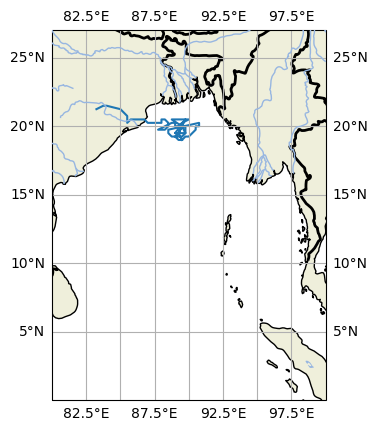

31


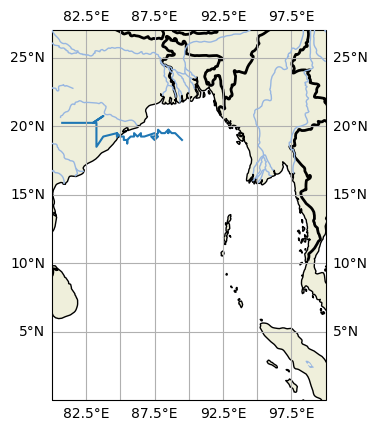

32


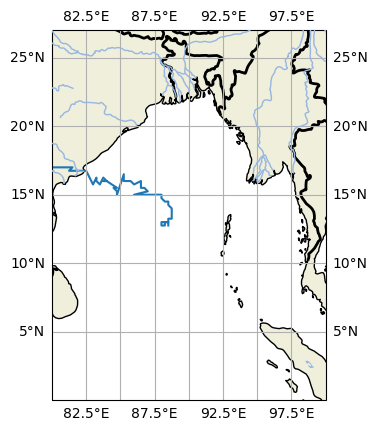

33


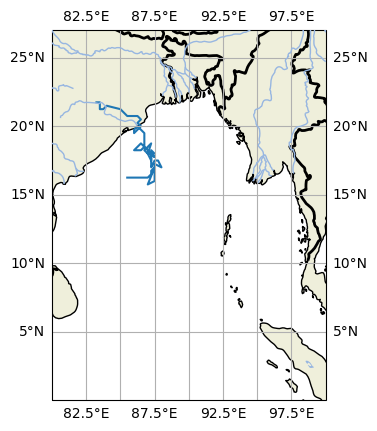

34


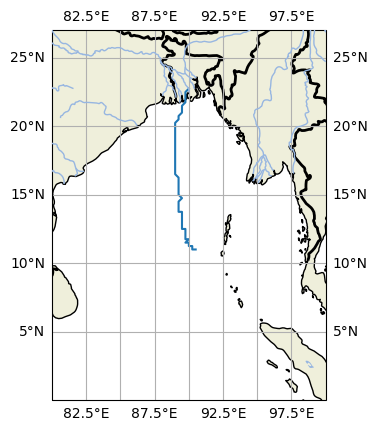

35


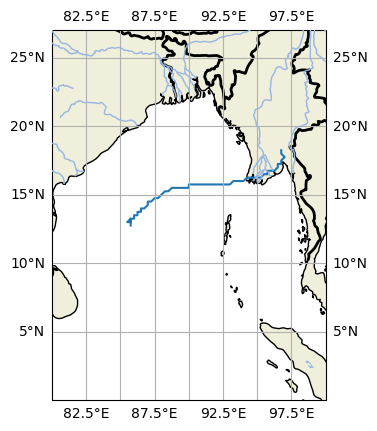

36


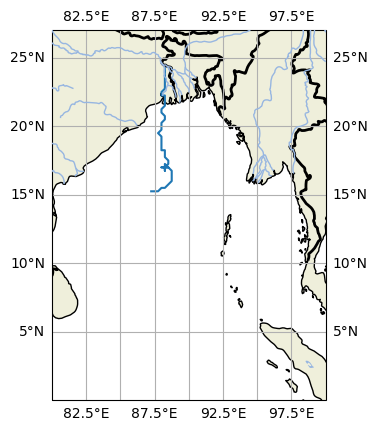

37


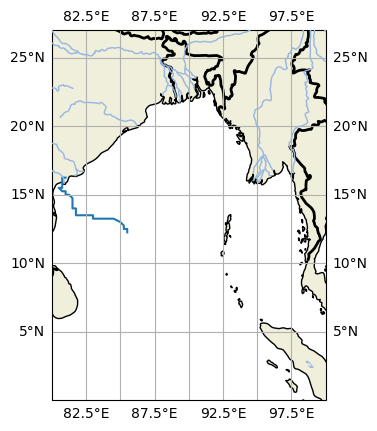

38


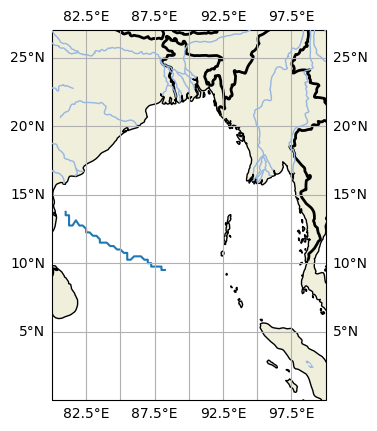

39


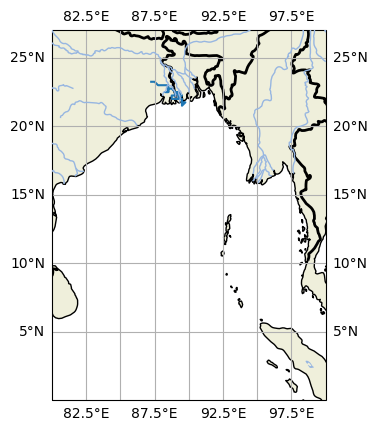

40


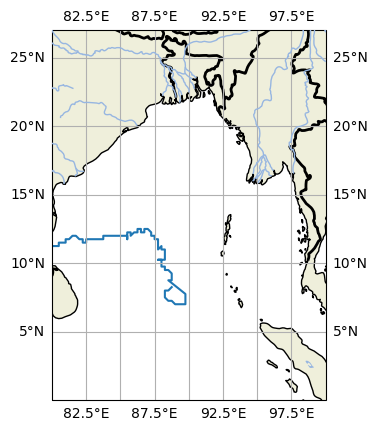

41


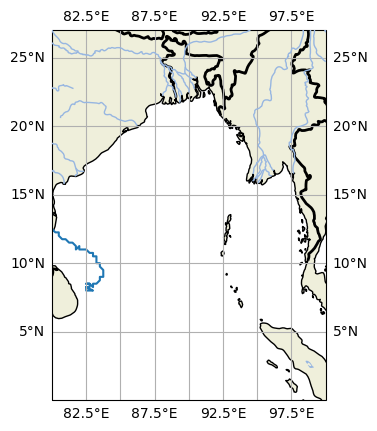

42


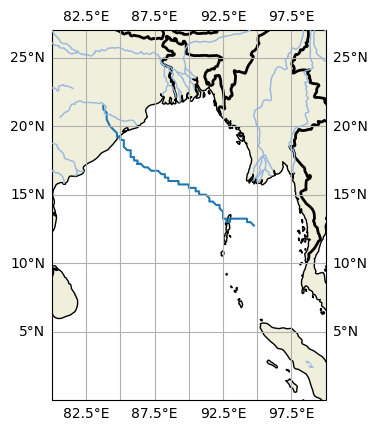

43


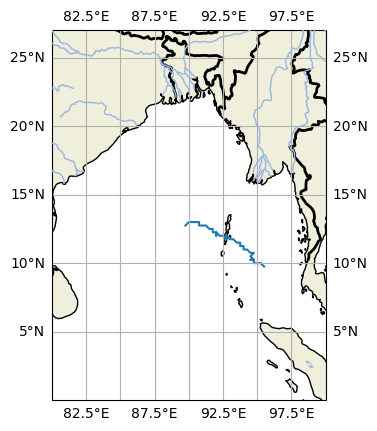

44


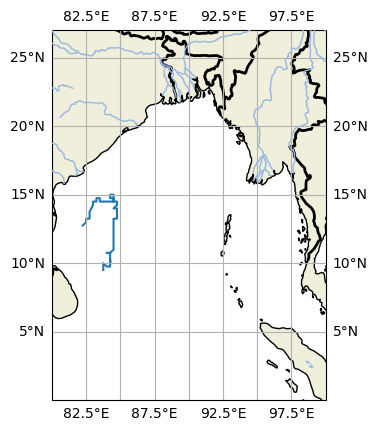

45


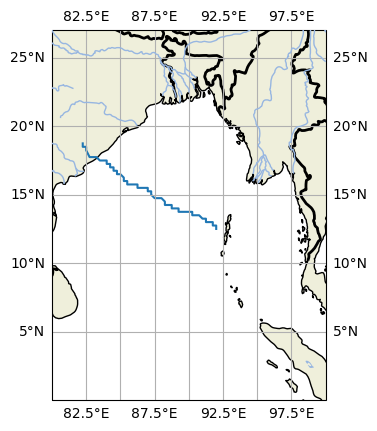

46


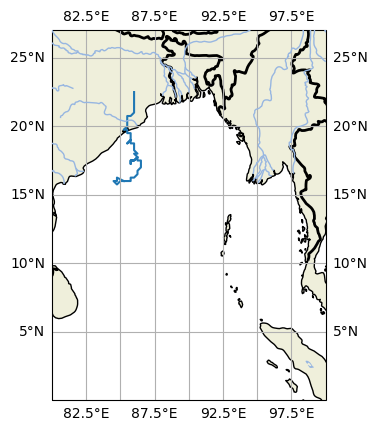

47


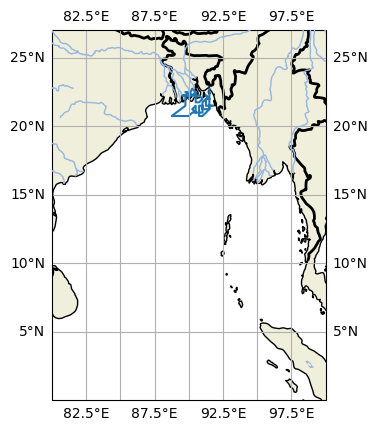

48


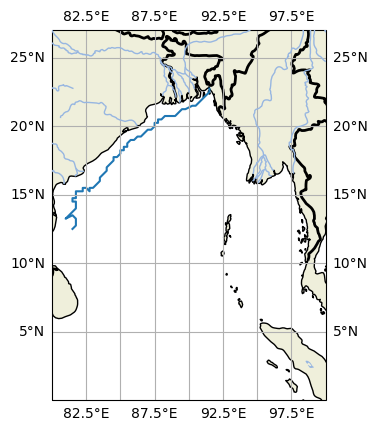

49


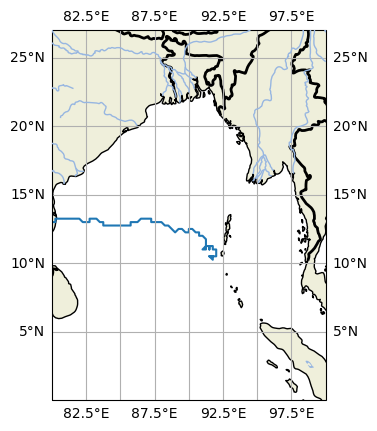

50


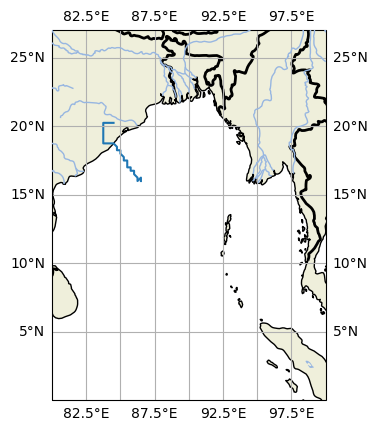

51


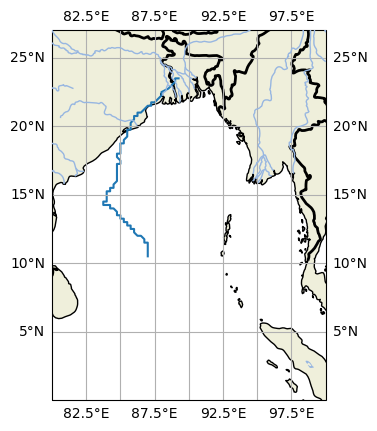

52


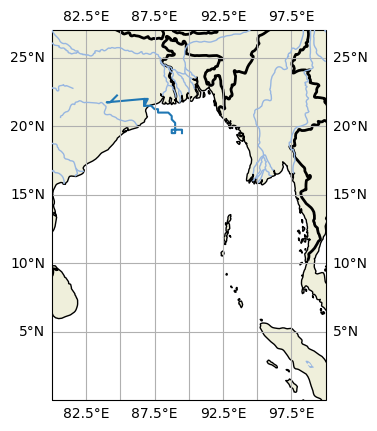

53


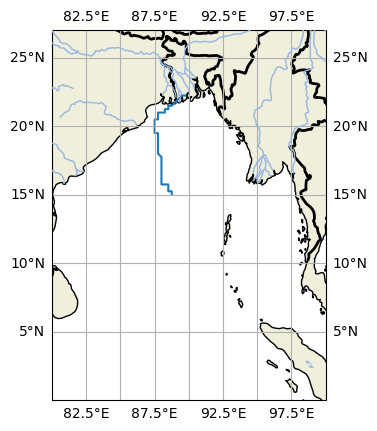

54


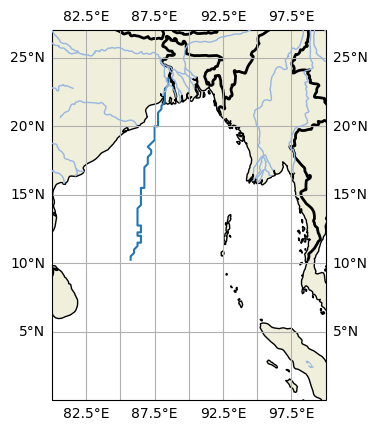

55


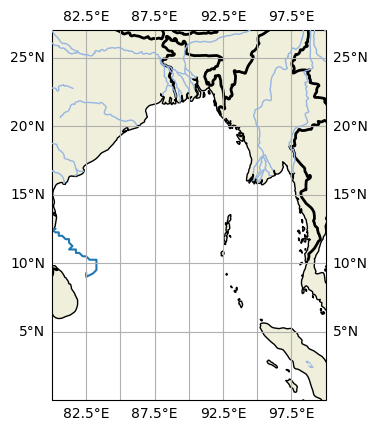

In [ ]:
for i in range(len(l[0])):
  print(i+1)
  ax = plt.axes(projection=ccrs.PlateCarree())
  ax.coastlines()
  ax.add_feature(cf.BORDERS, linewidth=2)
  ax.add_feature(cf.LAKES)
  ax.add_feature(cf.LAND)
  ax.add_feature(cf.RIVERS, zorder=100)
  plt.plot(lat_lon_main['lon'][l[0][i]:l[1][i]+1],lat_lon_main['lat'][l[0][i]:l[1][i]+1])
  ax.set_extent([80, 100, 00, 27])
  ax.gridlines(draw_labels=True)
  plt.show()

In [ ]:
for i in l:
  print(i)

[0, 127, 179, 250, 307, 358, 447, 507, 674, 744, 805, 884, 981, 1030, 1097, 1159, 1217, 1282, 1341, 1424, 1494, 1579, 1655, 1715, 1772, 1834, 1929, 1998, 2076, 2155, 2253, 2325, 2387, 2460, 2549, 2677, 2741, 2809, 2869, 2919, 3054, 3109, 3229, 3288, 3411, 3523, 3620, 3728, 3813, 3930, 3984, 4094, 4154, 4229, 4336]
[126, 178, 249, 306, 357, 446, 506, 673, 743, 804, 883, 980, 1029, 1096, 1158, 1216, 1281, 1340, 1423, 1493, 1578, 1654, 1714, 1771, 1833, 1928, 1997, 2075, 2154, 2252, 2324, 2386, 2459, 2548, 2676, 2740, 2808, 2868, 2918, 3053, 3108, 3228, 3287, 3410, 3522, 3619, 3727, 3812, 3929, 3983, 4093, 4153, 4228, 4335, 4385]


In [ ]:
rquv_level_main = xr.open_mfdataset('/content/drive/MyDrive/ML_TCBOB/People/Sany/ERA5 DATA SANY/*')
sst_main = xr.open_mfdataset('/content/drive/MyDrive/ML_TCBOB/People/Sanjid/SST/*')

In [ ]:
#single cyclone
#slicing big data

l1 = str(datetime.strptime(str(lat_lon_main['Date'][l[0][0]]),'%Y-%m-%d %H:%M:%S')-timedelta(hours=12))
l2 = lat_lon_main['Date'][l[1][0]]

rquv = rquv_level_main.sel(time=slice(l1,l2))
sst = sst_main.sel(time=slice(l1,l2))
r = np.array(rquv['r'])
q = np.array(rquv['q'])
u = np.array(rquv['u'])
v = np.array(rquv['v'])
s = np.array(sst['sst'])
dates = lat_lon_main['Date'][l[0][0]:l[1][0]-5]
cyclone_no = [1]*len(dates)
lat = lat_lon_main['lat'][l[0][0]:l[1][0]-5]
lon = lat_lon_main['lon'][l[0][0]:l[1][0]-5]



grid = []
for j in range(len(dates)):
  gridt = []
  for i in [j,j+6,j+12]:
    rs1 = list(r[i][0][::12,::12].flatten())
    rs2 = list(r[i][1][::12,::12].flatten())
    rs3 = list(r[i][2][::12,::12].flatten())
    qs1 = list(q[i][0][::12,::12].flatten())
    qs2 = list(q[i][1][::12,::12].flatten())
    qs3 = list(q[i][2][::12,::12].flatten())
    us1 = list(u[i][0][::12,::12].flatten())
    us2 = list(u[i][1][::12,::12].flatten())
    us3 = list(u[i][2][::12,::12].flatten())
    vs1 = list(v[i][0][::12,::12].flatten())
    vs2 = list(v[i][1][::12,::12].flatten())
    vs3 = list(v[i][2][::12,::12].flatten())
    sst1 = list(s[i][::12,::12].flatten())
    gridt = gridt+rs1+rs2+rs3+qs1+qs2+qs3+us1+us2+us3+vs1+vs2+vs3+sst1
  grid.append(gridt)
gridframe = pd.DataFrame(grid,columns=['rquv grid']*2808)


eye = []
for j in range(len(dates)):
  x,y = latlon_index(lon[j],lat[j])
  r_eye = list(r[j+12,:,y,x])
  q_eye = list(q[j+12,:,y,x])
  u_eye = list(u[j+12,:,y,x])
  v_eye = list(v[j+12,:,y,x])
  eye.append(r_eye +q_eye+u_eye+v_eye)
eyeframe = pd.DataFrame(eye,columns=['eye']*12)

idframe = pd.DataFrame({'cyclone_no':cyclone_no,'Date':dates,'lat':lat,'lon':lon})
targetframe = pd.DataFrame({'lat+6':lat_lon_main['lat'][l[0][0]+6:l[1][0]+1],'lon+6':lat_lon_main['lon'][l[0][0]+6:l[1][0]+1]})
targetframe=targetframe.reset_index().drop(columns=['index'])

cyclone1 = pd.concat([idframe,eyeframe,gridframe,targetframe],axis=1)
cyclone1

,cyclone_no,Date,lat,lon,eye,eye,eye,eye,eye,eye,...,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,lat+6,lon+6
0,1,1979-05-07 22:00:00,6.75,86.50,95.660950,97.736984,95.491577,0.000016,0.005992,0.014564,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
1,1,1979-05-07 23:00:00,6.75,86.25,93.597015,97.013519,92.399307,0.000016,0.005942,0.014518,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
2,1,1979-05-08 00:00:00,6.75,86.25,96.556213,92.251709,94.831024,0.000015,0.005842,0.014695,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
3,1,1979-05-08 01:00:00,6.75,86.00,98.818558,98.317696,94.402756,0.000016,0.005979,0.014798,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
4,1,1979-05-08 02:00:00,6.75,86.00,100.057404,97.221611,92.912262,0.000016,0.006008,0.014700,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,1979-05-12 18:00:00,15.50,80.25,93.195358,43.479431,93.296982,0.000020,0.004550,0.016165,...,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN,15.75,80.0
117,1,1979-05-12 19:00:00,15.50,80.25,90.444252,43.176979,92.830002,0.000020,0.004491,0.016241,...,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN,15.75,80.0
118,1,1979-05-12 20:00:00,15.50,80.25,94.823769,49.574455,93.013885,0.000021,0.004967,0.016298,...,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN,15.75,80.0
119,1,1979-05-12 21:00:00,15.75,80.00,95.155258,56.308258,96.060196,0.000021,0.005444,0.016314,...,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN,16.00,80.0


In [ ]:
def latlon_index(x,y):
  return int((x-78)//0.25),int((25-y)//0.25)

In [ ]:
grid = []
for j in range(len(dates)):
  gridt = []
  for i in [j,j+6,j+12]:
    rs1 = list(r[i][0][::12,::12].flatten())
    rs2 = list(r[i][1][::12,::12].flatten())
    rs3 = list(r[i][2][::12,::12].flatten())
    qs1 = list(q[i][0][::12,::12].flatten())
    qs2 = list(q[i][1][::12,::12].flatten())
    qs3 = list(q[i][2][::12,::12].flatten())
    us1 = list(u[i][0][::12,::12].flatten())
    us2 = list(u[i][1][::12,::12].flatten())
    us3 = list(u[i][2][::12,::12].flatten())
    vs1 = list(v[i][0][::12,::12].flatten())
    vs2 = list(v[i][1][::12,::12].flatten())
    vs3 = list(v[i][2][::12,::12].flatten())
    sst1 = list(s[i][::12,::12].flatten())
    gridt = gridt+rs1+rs2+rs3+qs1+qs2+qs3+us1+us2+us3+vs1+vs2+vs3+sst1
  grid.append(gridt)
len(grid[0])

2808

In [ ]:
gridframe = pd.DataFrame(grid,columns=['rquv grid']*2808)
gridframe

,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,...,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid
0,24.412830,22.264206,21.216511,18.400074,21.560097,29.295620,46.525734,44.072243,17.630634,25.295990,...,302.868225,303.548798,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN
1,21.390724,22.283562,21.126984,19.278397,24.727379,34.243744,42.305916,38.974102,17.446743,24.804806,...,302.868225,303.548798,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN
2,16.650688,19.897820,19.851845,20.268021,26.585648,33.800953,34.889782,40.215366,15.873989,24.647533,...,302.868225,303.548798,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN
3,15.363449,17.020889,18.554928,20.672096,27.899502,33.839668,26.614681,47.435513,14.427059,23.469177,...,302.868225,303.548798,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN
4,13.062393,15.472332,17.395931,20.836632,29.109310,33.152496,25.298409,53.922512,13.246284,22.612633,...,302.868225,303.548798,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,79.645493,99.488792,65.280205,18.900936,23.582901,24.352337,29.806160,26.479183,100.021111,99.481537,...,302.867432,303.063660,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN
117,81.818306,100.732475,78.849434,19.343727,24.141830,24.751575,31.347458,25.695229,100.016266,96.832047,...,302.867432,303.063660,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN
118,95.300430,100.570358,95.102020,21.291519,24.342659,26.967949,32.141094,25.542793,99.808182,99.019386,...,302.867432,303.063660,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN
119,99.237152,99.793663,98.917763,24.277328,24.023270,30.222336,31.120014,26.832447,101.956802,100.137253,...,302.867432,303.063660,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN


In [ ]:
tor = pd.read_csv('/content/drive/MyDrive/ML_TCBOB/Data/Preprocessed_data/Final_combined_data.csv')
for i in tor.columns:
  print(i)

In [ ]:
eye = []
for j in range(len(dates)):
  x,y = latlon_index(lon[j],lat[j])
  r_eye = list(r[j+12,:,y,x])
  q_eye = list(q[j+12,:,y,x])
  u_eye = list(u[j+12,:,y,x])
  v_eye = list(v[j+12,:,y,x])
  eye.append(r_eye +q_eye+u_eye+v_eye)
len(eye),len(eye[0])

(121, 12)

In [ ]:
eyeframe = pd.DataFrame(eye,columns=['eye']*12)
eyeframe

,eye,eye,eye,eye,eye,eye,eye,eye,eye,eye,eye,eye
0,95.660950,97.736984,95.491577,0.000016,0.005992,0.014564,1.764991,-7.685078,-6.298649,-6.270707,-0.462345,3.122754
1,93.597015,97.013519,92.399307,0.000016,0.005942,0.014518,-1.472623,-8.693031,-2.421748,-9.197887,-3.679456,-0.264412
2,96.556213,92.251709,94.831024,0.000015,0.005842,0.014695,-2.690406,-7.916475,-0.605861,-8.279310,-3.484310,2.296174
3,98.818558,98.317696,94.402756,0.000016,0.005979,0.014798,-5.098516,-4.996544,0.186384,-6.063017,-6.676331,-2.850088
4,100.057404,97.221611,92.912262,0.000016,0.006008,0.014700,-7.273268,-2.288400,0.280513,-3.056384,-5.908295,-1.523099
...,...,...,...,...,...,...,...,...,...,...,...,...
116,93.195358,43.479431,93.296982,0.000020,0.004550,0.016165,3.174952,-1.453013,-8.906782,10.131260,22.283239,1.101606
117,90.444252,43.176979,92.830002,0.000020,0.004491,0.016241,3.157302,0.643298,-4.778872,8.735970,20.471176,4.315928
118,94.823769,49.574455,93.013885,0.000021,0.004967,0.016298,3.792666,3.002383,-0.035209,8.005569,18.811047,6.783123
119,95.155258,56.308258,96.060196,0.000021,0.005444,0.016314,5.557569,-3.992510,-10.391260,7.849453,12.279252,-1.768425


In [ ]:
idframe = pd.DataFrame({'cyclone_no':cyclone_no,'Date':dates,'lat':lat,'lon':lon})
idframe

,cyclone_no,Date,lat,lon
0,1,1979-05-07 22:00:00,6.75,86.50
1,1,1979-05-07 23:00:00,6.75,86.25
2,1,1979-05-08 00:00:00,6.75,86.25
3,1,1979-05-08 01:00:00,6.75,86.00
4,1,1979-05-08 02:00:00,6.75,86.00
...,...,...,...,...
116,1,1979-05-12 18:00:00,15.50,80.25
117,1,1979-05-12 19:00:00,15.50,80.25
118,1,1979-05-12 20:00:00,15.50,80.25
119,1,1979-05-12 21:00:00,15.75,80.00


In [ ]:
targetframe = pd.DataFrame({'lat+6':lat_lon_main['lat'][l[0][0]+6:l[1][0]+1],'lon+6':lat_lon_main['lon'][l[0][0]+6:l[1][0]+1]})
targetframe=targetframe.reset_index().drop(columns=['index'])
targetframe

,lat+6,lon+6
0,6.75,86.0
1,6.75,86.0
2,6.75,86.0
3,6.75,86.0
4,6.75,86.0
...,...,...
116,15.75,80.0
117,15.75,80.0
118,15.75,80.0
119,16.00,80.0


In [ ]:
pd.concat([idframe,eyeframe,gridframe,targetframe],axis=1)

,cyclone_no,Date,lat,lon,eye,eye,eye,eye,eye,eye,...,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,rquv grid,lat+6,lon+6
0,1,1979-05-07 22:00:00,6.75,86.50,95.660950,97.736984,95.491577,0.000016,0.005992,0.014564,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
1,1,1979-05-07 23:00:00,6.75,86.25,93.597015,97.013519,92.399307,0.000016,0.005942,0.014518,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
2,1,1979-05-08 00:00:00,6.75,86.25,96.556213,92.251709,94.831024,0.000015,0.005842,0.014695,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
3,1,1979-05-08 01:00:00,6.75,86.00,98.818558,98.317696,94.402756,0.000016,0.005979,0.014798,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
4,1,1979-05-08 02:00:00,6.75,86.00,100.057404,97.221611,92.912262,0.000016,0.006008,0.014700,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,1979-05-12 18:00:00,15.50,80.25,93.195358,43.479431,93.296982,0.000020,0.004550,0.016165,...,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN,15.75,80.0
117,1,1979-05-12 19:00:00,15.50,80.25,90.444252,43.176979,92.830002,0.000020,0.004491,0.016241,...,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN,15.75,80.0
118,1,1979-05-12 20:00:00,15.50,80.25,94.823769,49.574455,93.013885,0.000021,0.004967,0.016298,...,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN,15.75,80.0
119,1,1979-05-12 21:00:00,15.75,80.00,95.155258,56.308258,96.060196,0.000021,0.005444,0.016314,...,302.324432,302.292206,302.345001,302.388824,302.856750,303.107666,303.052032,NaN,16.00,80.0


In [ ]:
for c in range(55):
  l1 = str(datetime.strptime(str(lat_lon_main['Date'][l[0][c]]),'%Y-%m-%d %H:%M:%S')-timedelta(hours=12))
  l2 = lat_lon_main['Date'][l[1][c]]

  rquv = rquv_level_main.sel(time=slice(l1,l2))
  sst = sst_main.sel(time=slice(l1,l2))
  r = np.array(rquv['r'])
  q = np.array(rquv['q'])
  u = np.array(rquv['u'])
  v = np.array(rquv['v'])
  s = np.array(sst['sst'])
  dates = list(lat_lon_main['Date'][l[0][c]:l[1][c]-5])
  cyclone_no = [c+1]*len(dates)
  lat = list(lat_lon_main['lat'][l[0][c]:l[1][c]-5])
  lon = list(lat_lon_main['lon'][l[0][c]:l[1][c]-5])


  grid = []
  for j in range(len(dates)):
    gridt = []
    for i in [j,j+6,j+12]:
      rs1 = list(r[i][0][::12,::12].flatten())
      rs2 = list(r[i][1][::12,::12].flatten())
      rs3 = list(r[i][2][::12,::12].flatten())
      qs1 = list(q[i][0][::12,::12].flatten())
      qs2 = list(q[i][1][::12,::12].flatten())
      qs3 = list(q[i][2][::12,::12].flatten())
      us1 = list(u[i][0][::12,::12].flatten())
      us2 = list(u[i][1][::12,::12].flatten())
      us3 = list(u[i][2][::12,::12].flatten())
      vs1 = list(v[i][0][::12,::12].flatten())
      vs2 = list(v[i][1][::12,::12].flatten())
      vs3 = list(v[i][2][::12,::12].flatten())
      sst1 = list(s[i][::12,::12].flatten())
      gridt = gridt+rs1+rs2+rs3+qs1+qs2+qs3+us1+us2+us3+vs1+vs2+vs3+sst1
    grid.append(gridt)
  gridframe = pd.DataFrame(grid,columns=['rquv grid']*2808)


  eye = []
  for j in range(len(dates)):
    x,y = latlon_index(lon[j],lat[j])
    r_eye = list(r[j+12,:,y,x])
    q_eye = list(q[j+12,:,y,x])
    u_eye = list(u[j+12,:,y,x])
    v_eye = list(v[j+12,:,y,x])
    eye.append(r_eye +q_eye+u_eye+v_eye)
  eyeframe = pd.DataFrame(eye,columns=['eye']*12)

  idframe = pd.DataFrame({'cyclone_no':cyclone_no,'Date':dates,'lat':lat,'lon':lon})
  targetframe = pd.DataFrame({'lat+6':lat_lon_main['lat'][l[0][c]+6:l[1][c]+1],'lon+6':lat_lon_main['lon'][l[0][c]+6:l[1][c]+1]})
  targetframe=targetframe.reset_index().drop(columns=['index'])

  cyclone = pd.concat([idframe,eyeframe,gridframe,targetframe],axis=1)
  cyclone.to_excel('/content/drive/MyDrive/ML_TCBOB/People/Rifat/indiv_cycl/cyclone '+str(c+1)+'.xlsx')

In [ ]:
all_cyclone = pd.read_excel('/content/drive/MyDrive/ML_TCBOB/People/Rifat/indiv_cycl/cyclone 1.xlsx')
for i in range(2,56):
  single = pd.read_excel('/content/drive/MyDrive/ML_TCBOB/People/Rifat/indiv_cycl/cyclone ' + str(i)+'.xlsx')
  all_cyclone = pd.concat([all_cyclone,single],axis=0)
  print(i)
all_cyclone

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


,Unnamed: 0,cyclone_no,Date,lat,lon,eye,eye.1,eye.2,eye.3,eye.4,...,rquv grid.2800,rquv grid.2801,rquv grid.2802,rquv grid.2803,rquv grid.2804,rquv grid.2805,rquv grid.2806,rquv grid.2807,lat+6,lon+6
0,0,1,1979-05-07 22:00:00,6.75,86.50,95.660950,97.736984,95.491577,0.000016,0.005992,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
1,1,1,1979-05-07 23:00:00,6.75,86.25,93.597015,97.013519,92.399307,0.000016,0.005942,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
2,2,1,1979-05-08 00:00:00,6.75,86.25,96.556213,92.251709,94.831024,0.000015,0.005842,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
3,3,1,1979-05-08 01:00:00,6.75,86.00,98.818558,98.317696,94.402756,0.000016,0.005979,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
4,4,1,1979-05-08 02:00:00,6.75,86.00,100.057404,97.221611,92.912262,0.000016,0.006008,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,39,1,2020-11-25 23:00:00,12.50,80.25,100.396767,84.179993,81.660622,0.000015,0.005620,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.00,79.75
40,40,1,2020-11-26 00:00:00,12.50,80.00,99.367599,92.404381,95.331253,0.000015,0.005853,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.25,79.75
41,41,1,2020-11-26 01:00:00,12.75,80.00,100.506821,87.344818,94.340759,0.000014,0.005490,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.25,79.50
42,42,1,2020-11-26 02:00:00,12.75,80.00,99.763206,78.674263,88.171722,0.000013,0.005062,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.50,79.75


In [ ]:
all_cyclone = all_cyclone.reset_index()


,index,Unnamed: 0,cyclone_no,Date,lat,lon,eye,eye.1,eye.2,eye.3,...,rquv grid.2800,rquv grid.2801,rquv grid.2802,rquv grid.2803,rquv grid.2804,rquv grid.2805,rquv grid.2806,rquv grid.2807,lat+6,lon+6
0,0,0,1,1979-05-07 22:00:00,6.75,86.50,95.660950,97.736984,95.491577,0.000016,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
1,1,1,1,1979-05-07 23:00:00,6.75,86.25,93.597015,97.013519,92.399307,0.000016,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
2,2,2,1,1979-05-08 00:00:00,6.75,86.25,96.556213,92.251709,94.831024,0.000015,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
3,3,3,1,1979-05-08 01:00:00,6.75,86.00,98.818558,98.317696,94.402756,0.000016,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
4,4,4,1,1979-05-08 02:00:00,6.75,86.00,100.057404,97.221611,92.912262,0.000016,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,39,39,1,2020-11-25 23:00:00,12.50,80.25,100.396767,84.179993,81.660622,0.000015,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.00,79.75
4052,40,40,1,2020-11-26 00:00:00,12.50,80.00,99.367599,92.404381,95.331253,0.000015,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.25,79.75
4053,41,41,1,2020-11-26 01:00:00,12.75,80.00,100.506821,87.344818,94.340759,0.000014,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.25,79.50
4054,42,42,1,2020-11-26 02:00:00,12.75,80.00,99.763206,78.674263,88.171722,0.000013,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.50,79.75


In [ ]:
all_cyclone = all_cyclone.drop(columns=['index','Unnamed: 0'])
all_cyclone

,cyclone_no,Date,lat,lon,eye,eye.1,eye.2,eye.3,eye.4,eye.5,...,rquv grid.2800,rquv grid.2801,rquv grid.2802,rquv grid.2803,rquv grid.2804,rquv grid.2805,rquv grid.2806,rquv grid.2807,lat+6,lon+6
0,1,1979-05-07 22:00:00,6.75,86.50,95.660950,97.736984,95.491577,0.000016,0.005992,0.014564,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
1,1,1979-05-07 23:00:00,6.75,86.25,93.597015,97.013519,92.399307,0.000016,0.005942,0.014518,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
2,1,1979-05-08 00:00:00,6.75,86.25,96.556213,92.251709,94.831024,0.000015,0.005842,0.014695,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
3,1,1979-05-08 01:00:00,6.75,86.00,98.818558,98.317696,94.402756,0.000016,0.005979,0.014798,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
4,1,1979-05-08 02:00:00,6.75,86.00,100.057404,97.221611,92.912262,0.000016,0.006008,0.014700,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,1,2020-11-25 23:00:00,12.50,80.25,100.396767,84.179993,81.660622,0.000015,0.005620,0.013910,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.00,79.75
4052,1,2020-11-26 00:00:00,12.50,80.00,99.367599,92.404381,95.331253,0.000015,0.005853,0.015097,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.25,79.75
4053,1,2020-11-26 01:00:00,12.75,80.00,100.506821,87.344818,94.340759,0.000014,0.005490,0.014853,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.25,79.50
4054,1,2020-11-26 02:00:00,12.75,80.00,99.763206,78.674263,88.171722,0.000013,0.005062,0.014534,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.50,79.75


In [ ]:
for i in all_cyclone.columns:
  print(i)

In [ ]:
g = pd.DataFrame([[1,2,3],[4,5,6]],columns=['a']*3)
h = pd.DataFrame([[7,8,9,],[10,11,12]],columns=['a']*3)
pd.concat([g,h],axis=0)

,a,a,a
0,1,2,3
1,4,5,6
0,7,8,9
1,10,11,12


In [ ]:
cyclone_no = []
for c in range(55):
  dates = list(lat_lon_main['Date'][l[0][c]:l[1][c]-5])
  cyclone_no += [c+1]*len(dates)
len(cyclone_no)

4056

In [ ]:
all_cyclone['cyclone_no'] = cyclone_no
all_cyclone

,cyclone_no,Date,lat,lon,eye,eye.1,eye.2,eye.3,eye.4,eye.5,...,rquv grid.2800,rquv grid.2801,rquv grid.2802,rquv grid.2803,rquv grid.2804,rquv grid.2805,rquv grid.2806,rquv grid.2807,lat+6,lon+6
0,1,1979-05-07 22:00:00,6.75,86.50,95.660950,97.736984,95.491577,0.000016,0.005992,0.014564,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
1,1,1979-05-07 23:00:00,6.75,86.25,93.597015,97.013519,92.399307,0.000016,0.005942,0.014518,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
2,1,1979-05-08 00:00:00,6.75,86.25,96.556213,92.251709,94.831024,0.000015,0.005842,0.014695,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
3,1,1979-05-08 01:00:00,6.75,86.00,98.818558,98.317696,94.402756,0.000016,0.005979,0.014798,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
4,1,1979-05-08 02:00:00,6.75,86.00,100.057404,97.221611,92.912262,0.000016,0.006008,0.014700,...,302.293976,302.067444,302.128967,302.358368,302.762665,302.859283,302.898346,NaN,6.75,86.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,55,2020-11-25 23:00:00,12.50,80.25,100.396767,84.179993,81.660622,0.000015,0.005620,0.013910,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.00,79.75
4052,55,2020-11-26 00:00:00,12.50,80.00,99.367599,92.404381,95.331253,0.000015,0.005853,0.015097,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.25,79.75
4053,55,2020-11-26 01:00:00,12.75,80.00,100.506821,87.344818,94.340759,0.000014,0.005490,0.014853,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.25,79.50
4054,55,2020-11-26 02:00:00,12.75,80.00,99.763206,78.674263,88.171722,0.000013,0.005062,0.014534,...,302.070648,302.349915,302.524658,302.255035,302.350769,302.094910,302.235504,NaN,13.50,79.75


In [ ]:
all_cyclone.to_excel('/content/drive/MyDrive/ML_TCBOB/People/Rifat/indiv_cycl/all_cyclone.xlsx')

In [ ]:
for i in range(len(cyclone_no)):
  if cyclone_no[i]==46:
    print(i)

3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
